In [1]:
import  numpy as np
import matplotlib.pyplot as plt

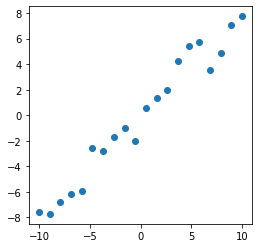

In [31]:
N = 20
X = np.concatenate((np.ones((N, 1)), np.linspace(-10, 10, N).reshape(-1, 1)), axis=1)
theta = np.array([-0.1, 0.8])
sigma = 1
y_lin = np.random.normal(X @ theta, sigma, X.shape[0])
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X[:, 1], y_lin)
plt.show()

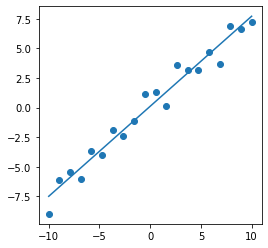

In [10]:
theta_ML = np.linalg.solve(X.T @ X, X.T) @ y_lin
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X[:, 1], y_lin)
ax.plot(X[:, 1], X @ theta_ML)
plt.show()

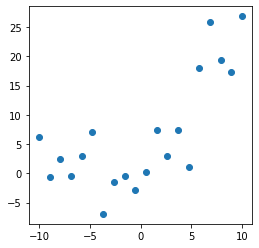

In [48]:
sigma = 5
y_poly = np.random.normal(0.2*X[:, 1]**2 + X @ theta, sigma, X.shape[0])
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X[:, 1], y_poly)
plt.show()

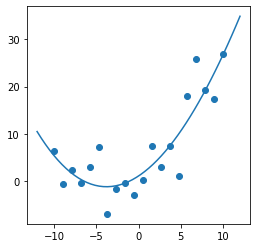

In [49]:
poly_3order = lambda x: np.concatenate((np.ones(len(x)).reshape(-1, 1), x, x**2, x**3), axis=1)
phi = poly_3order(X[:, 1].reshape(-1, 1))
theta_ML_poly = np.linalg.solve(phi.T @ phi, phi.T) @ y_poly
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X[:, 1], y_poly)
x_plot = np.linspace(-12, 12, 50).reshape(-1, 1)
ax.plot(x_plot, poly_3order(x_plot) @ theta_ML_poly)
plt.show()

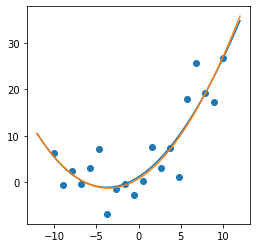

In [52]:
sigma_ML = np.mean((y_poly - phi @ theta_ML_poly)**2)
b = 1 # prior on theta
theta_MAP_poly = np.linalg.solve(phi.T @ phi + sigma/b*np.eye(phi.shape[1]), phi.T) @ y_poly
fig, ax = plt.subplots(figsize=(4, 4))
ax.scatter(X[:, 1], y_poly)
x_plot = np.linspace(-12, 12, 50).reshape(-1, 1)
ax.plot(x_plot, poly_3order(x_plot) @ theta_ML_poly)
ax.plot(x_plot, poly_3order(x_plot) @ theta_MAP_poly)
plt.show()

For Bayesian linear regression, see: https://github.com/sradicwebster/probabilistic_ml/blob/main/bayesian_linear_regression.ipynb